RANDOM FOREST

In [73]:
import pandas as pd

# Load the data
data_path = r"C:\Users\Gebruiker\Downloads\Rookie_Data_without_Success___0.csv"  # Corrected path with raw string format
rookie_data_df = pd.read_csv(data_path)

# Redefine success classification with 1 as "Low Success" and 2 and above as "High Success"
rookie_data_filtered = rookie_data_df[rookie_data_df['success'] > 0].copy()
rookie_data_filtered['Success_Class'] = rookie_data_filtered['success'].apply(lambda x: 'High Success' if x >= 2 else 'Low Success')

# Check the distribution of the newly defined Success_Class
success_class_distribution = rookie_data_filtered['Success_Class'].value_counts(normalize=True) * 100
success_class_distribution_summary = success_class_distribution.to_frame(name='Percentage')

# Displaying the filtered dataset
print("Filtered Rookie Data:")
print(rookie_data_filtered.head())  # Displaying the first few rows of filtered data

# Displaying the success class distribution summary
print("\nSuccess Class Distribution Summary:")
print(success_class_distribution_summary)


Filtered Rookie Data:
   Unnamed: 0             Player         Debut  Age   G    MP    FG%    3P%  \
0          89  victor wembanyama  202310250SAS   20  52  1481  0.467  0.318   
1          94     paolo banchero  202210190DET   20  72  2430  0.427  0.298   
2         182     scottie barnes  202110200TOR   20  74  2617  0.492  0.301   
3         229      herbert jones  202110200NOP   23  78  2335  0.476  0.337   
4         248        evan mobley  202110200MEM   20  69  2331  0.508  0.250   

     FT%  PER GAME MP  ...  PER GAME BLK  PER GAME TOV     Season  \
0  0.813         28.5  ...           3.3           3.4  2023-2024   
1  0.738         33.8  ...           0.5           2.8  2022-2023   
2  0.735         35.4  ...           0.7           1.8  2021-2022   
3  0.840         29.9  ...           0.8           1.3  2021-2022   
4  0.663         33.8  ...           1.7           1.9  2021-2022   

   All-League Team  Rookie of the Year  Defensive Award Winner MVP Winner  \
0          

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
data_path = r"C:\Users\Gebruiker\Downloads\Rookie_Data_without_Success___0.csv"
rookie_data_df = pd.read_csv(data_path)

# Map Success_Class based on the success column
rookie_data_df["Success_Class"] = rookie_data_df["success"].apply(
    lambda x: "High Success" if x >= 2 else "Low Success"
)

# Convert Success_Class to binary labels
rookie_data_df["Success_Class"] = rookie_data_df["Success_Class"].map(
    {"Low Success": 0, "High Success": 1}
)

# Features and target variable
features = [
    "Age", "G", "MP", "FG%", "3P%", "FT%", 
    "PER GAME MP", "PER GAME PTS", "PER GAME TRB", 
    "PER GAME AST", "PER GAME STL", "PER GAME BLK", "PER GAME TOV"
]
target = "Success_Class"

# Extract features (X) and target (y)
X = rookie_data_df[features]
y = rookie_data_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Map predictions and true labels back to their original labels
label_mapping = {0: "Low Success", 1: "High Success"}
y_test_mapped = y_test.map(label_mapping)
y_pred_mapped = pd.Series(y_pred).map(label_mapping)

# Evaluate the model
print("Confusion Matrix:")
print(pd.crosstab(y_test_mapped, y_pred_mapped, rownames=['Actual'], colnames=['Predicted']))
print("\nClassification Report:")
print(classification_report(y_test_mapped, y_pred_mapped))
print("\nAccuracy Score:", accuracy_score(y_test_mapped, y_pred_mapped))

# Feature Importance
print("\nFeature Importance:")
feature_importance = rf_classifier.feature_importances_
for name, importance in zip(features, feature_importance):
    print(f"{name}: {importance:.4f}")


Confusion Matrix:
Predicted     High Success  Low Success
Actual                                 
High Success             1            4
Low Success              8           13

Classification Report:
              precision    recall  f1-score   support

High Success       0.54      0.52      0.53        27
 Low Success       0.77      0.79      0.78        56

    accuracy                           0.70        83
   macro avg       0.66      0.65      0.65        83
weighted avg       0.70      0.70      0.70        83


Accuracy Score: 0.6987951807228916

Feature Importance:
Age: 0.0509
G: 0.0515
MP: 0.0763
FG%: 0.0882
3P%: 0.0517
FT%: 0.1004
PER GAME MP: 0.0763
PER GAME PTS: 0.1009
PER GAME TRB: 0.1015
PER GAME AST: 0.0714
PER GAME STL: 0.0736
PER GAME BLK: 0.0623
PER GAME TOV: 0.0948


Smoteen only

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.combine import SMOTEENN

# Load the dataset
data_path = r"C:\Users\Gebruiker\Downloads\Rookie_Data_without_Success___0.csv"
rookie_data_df = pd.read_csv(data_path)

# Map Success_Class based on the success column
rookie_data_df["Success_Class"] = rookie_data_df["success"].apply(
    lambda x: "High Success" if x >= 2 else "Low Success"
)
rookie_data_df["Success_Class"] = rookie_data_df["Success_Class"].map(
    {"Low Success": 0, "High Success": 1}
)

# Features and target variable
features = [
    "Age", "G", "MP", "FG%", "3P%", "FT%", 
    "PER GAME MP", "PER GAME PTS", "PER GAME TRB", 
    "PER GAME AST", "PER GAME STL", "PER GAME BLK", "PER GAME TOV"
]
target = "Success_Class"

X = rookie_data_df[features]
y = rookie_data_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTEENN to balance the training data
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Display class distribution after SMOTEENN
print("Class distribution after SMOTEENN:")
print(pd.Series(y_train_resampled).value_counts())

# Train the Random Forest model on the resampled data
rf_classifier = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Map predictions and true labels back to their original labels
label_mapping = {0: "Low Success", 1: "High Success"}
y_test_mapped = y_test.map(label_mapping)
y_pred_mapped = pd.Series(y_pred).map(label_mapping)

# Evaluate the model
print("\nConfusion Matrix:")
print(pd.crosstab(y_test_mapped, y_pred_mapped, rownames=['Actual'], colnames=['Predicted']))
print("\nClassification Report:")
print(classification_report(y_test_mapped, y_pred_mapped))
print("\nAccuracy Score:", accuracy_score(y_test_mapped, y_pred_mapped))

# Feature Importance
print("\nFeature Importance:")
feature_importance = pd.Series(rf_classifier.feature_importances_, index=features).sort_values(ascending=False)
print(feature_importance)


Class distribution after SMOTEENN:
Success_Class
1    39
0    25
Name: count, dtype: int64

Confusion Matrix:
Predicted     High Success  Low Success
Actual                                 
High Success             2            3
Low Success              9           12

Classification Report:
              precision    recall  f1-score   support

High Success       0.50      0.74      0.60        27
 Low Success       0.84      0.64      0.73        56

    accuracy                           0.67        83
   macro avg       0.67      0.69      0.66        83
weighted avg       0.73      0.67      0.68        83


Accuracy Score: 0.6746987951807228

Feature Importance:
PER GAME PTS    0.188585
PER GAME TOV    0.129682
Age             0.120593
PER GAME MP     0.113307
PER GAME TRB    0.090112
MP              0.065999
PER GAME STL    0.059245
FG%             0.054170
PER GAME AST    0.052662
FT%             0.040472
G               0.033782
3P%             0.028303
PER GAME BLK    0.0230

checking best parameters

In [97]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1_macro')
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


I will use the best parameters



In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.combine import SMOTEENN

# Load the dataset
data_path = r"C:\Users\Gebruiker\Downloads\Rookie_Data_without_Success___0.csv"
rookie_data_df = pd.read_csv(data_path)

# Map Success_Class based on the success column
rookie_data_df["Success_Class"] = rookie_data_df["success"].apply(
    lambda x: "High Success" if x >= 2 else "Low Success"
)
rookie_data_df["Success_Class"] = rookie_data_df["Success_Class"].map(
    {"Low Success": 0, "High Success": 1}
)

# Features and target variable
features = [
    "Age", "G", "MP", "FG%", "3P%", "FT%", 
    "PER GAME MP", "PER GAME PTS", "PER GAME TRB", 
    "PER GAME AST", "PER GAME STL", "PER GAME BLK", "PER GAME TOV"
]
target = "Success_Class"

X = rookie_data_df[features]
y = rookie_data_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTEENN to balance the training data
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Display class distribution after SMOTEENN
print("Class distribution after SMOTEENN:")
print(pd.Series(y_train_resampled).value_counts())

# Train the Random Forest model with the best parameters
best_rf = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=200,
    random_state=42
)
best_rf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Map predictions and true labels back to their original labels
label_mapping = {0: "Low Success", 1: "High Success"}
y_test_mapped = y_test.map(label_mapping)
y_pred_mapped = pd.Series(y_pred).map(label_mapping)

# Evaluate the model
print("\nConfusion Matrix:")
print(pd.crosstab(y_test_mapped, y_pred_mapped, rownames=['Actual'], colnames=['Predicted']))

print("\nClassification Report:")
print(classification_report(y_test_mapped, y_pred_mapped))

print("\nAccuracy Score:", accuracy_score(y_test_mapped, y_pred_mapped))

# Feature Importance
feature_importance = pd.Series(best_rf.feature_importances_, index=features).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Class distribution after SMOTEENN:
Success_Class
1    39
0    25
Name: count, dtype: int64

Confusion Matrix:
Predicted     High Success  Low Success
Actual                                 
High Success             2            3
Low Success              9           12

Classification Report:
              precision    recall  f1-score   support

High Success       0.49      0.74      0.59        27
 Low Success       0.83      0.62      0.71        56

    accuracy                           0.66        83
   macro avg       0.66      0.68      0.65        83
weighted avg       0.72      0.66      0.67        83


Accuracy Score: 0.6626506024096386

Feature Importance:
PER GAME PTS    0.201647
PER GAME MP     0.130084
Age             0.126066
PER GAME TOV    0.121583
PER GAME TRB    0.084171
MP              0.060764
PER GAME STL    0.059811
FG%             0.058576
PER GAME AST    0.050102
FT%             0.036321
G               0.026409
3P%             0.025433
PER GAME BLK    0.0190


Confusion Matrix (Threshold = 0.4):
Predicted     High Success  Low Success
Actual                                 
High Success             2            3
Low Success              6           15

Classification Report (Threshold = 0.4):
              precision    recall  f1-score   support

High Success       0.64      0.67      0.65        27
 Low Success       0.84      0.82      0.83        56

    accuracy                           0.77        83
   macro avg       0.74      0.74      0.74        83
weighted avg       0.77      0.77      0.77        83


AUC-PR Score: 0.7705026455026455


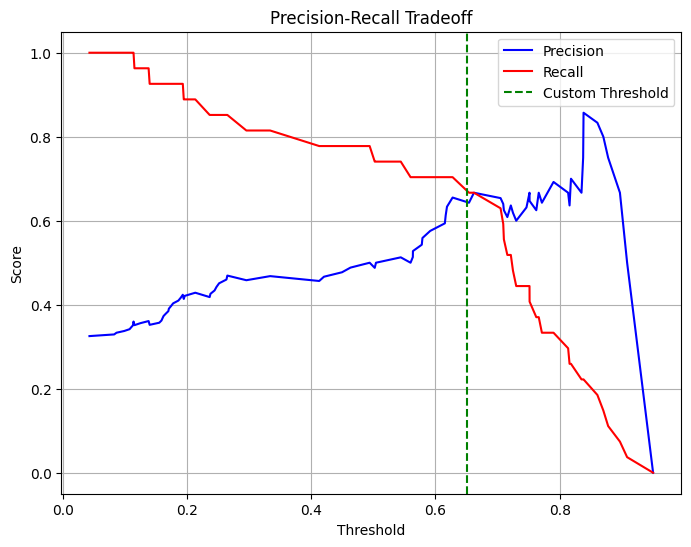

In [114]:
import numpy as np
from sklearn.metrics import roc_auc_score, precision_recall_curve, classification_report, confusion_matrix

# Get predicted probabilities for the positive class (High Success)
y_proba = best_rf.predict_proba(X_test)[:, 1]

# Define a custom threshold (e.g., 0.4)
custom_threshold = 0.65
y_pred_custom = (y_proba >= custom_threshold).astype(int)

# Map predictions and true labels back to their original labels
y_test_mapped = y_test.map({0: "Low Success", 1: "High Success"})
y_pred_mapped = pd.Series(y_pred_custom).map({0: "Low Success", 1: "High Success"})

# Evaluate the model with the custom threshold
print("\nConfusion Matrix (Threshold = 0.4):")
print(pd.crosstab(y_test_mapped, y_pred_mapped, rownames=['Actual'], colnames=['Predicted']))

print("\nClassification Report (Threshold = 0.4):")
print(classification_report(y_test_mapped, y_pred_mapped))

# Precision-Recall Curve for Threshold Tuning
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
print("\nAUC-PR Score:", roc_auc_score(y_test, y_proba))

# Visualize Precision-Recall Tradeoff
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='red')
plt.axvline(x=custom_threshold, color='green', linestyle='--', label='Custom Threshold')
plt.title("Precision-Recall Tradeoff")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()


Best & final model

In [128]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_recall_curve

# Get predicted probabilities for the positive class
y_proba = best_rf.predict_proba(X_test)[:, 1]

# Find the best threshold
thresholds = np.arange(0.1, 0.9, 0.05)  # Range of thresholds to evaluate
f1_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_threshold)
    f1_scores.append(f1)

# Find the optimal threshold
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]

print(f"Best Threshold: {best_threshold:.2f} with F1-Score: {f1_scores[best_threshold_index]:.4f}")

# Predict using the best threshold
y_pred_optimized = (y_proba >= best_threshold).astype(int)

# Map predictions and true labels back to their original labels
y_test_mapped = y_test.map({0: "Low Success", 1: "High Success"})
y_pred_mapped = pd.Series(y_pred_optimized).map({0: "Low Success", 1: "High Success"})

# Evaluate the model with the best threshold
print("\nConfusion Matrix (Best Threshold):")
print(pd.crosstab(y_test_mapped, y_pred_mapped, rownames=['Actual'], colnames=['Predicted']))

print("\nClassification Report (Best Threshold):")
print(classification_report(y_test_mapped, y_pred_mapped))


Best Threshold: 0.65 with F1-Score: 0.6545

Confusion Matrix (Best Threshold):
Predicted     High Success  Low Success
Actual                                 
High Success             2            3
Low Success              6           15

Classification Report (Best Threshold):
              precision    recall  f1-score   support

High Success       0.64      0.67      0.65        27
 Low Success       0.84      0.82      0.83        56

    accuracy                           0.77        83
   macro avg       0.74      0.74      0.74        83
weighted avg       0.77      0.77      0.77        83



Average Statistics for Predicted Classes:
                       Age          G           MP       FG%       3P%  \
Predicted_Class                                                          
High Success     21.341463  76.024390  2478.804878  0.476293  0.206244   
Low Success      21.976190  58.214286  1133.761905  0.448643  0.157810   

                      FT%  PER GAME MP  PER GAME PTS  PER GAME TRB  \
Predicted_Class                                                      
High Success     0.744732    32.478049      15.74878      6.531707   
Low Success      0.586690    16.750000       6.12381      3.242857   

                 PER GAME AST  PER GAME STL  PER GAME BLK  PER GAME TOV  
Predicted_Class                                                          
High Success         3.780488      1.187805      0.897561      2.317073  
Low Success          1.211905      0.616667      0.676190      0.926190  


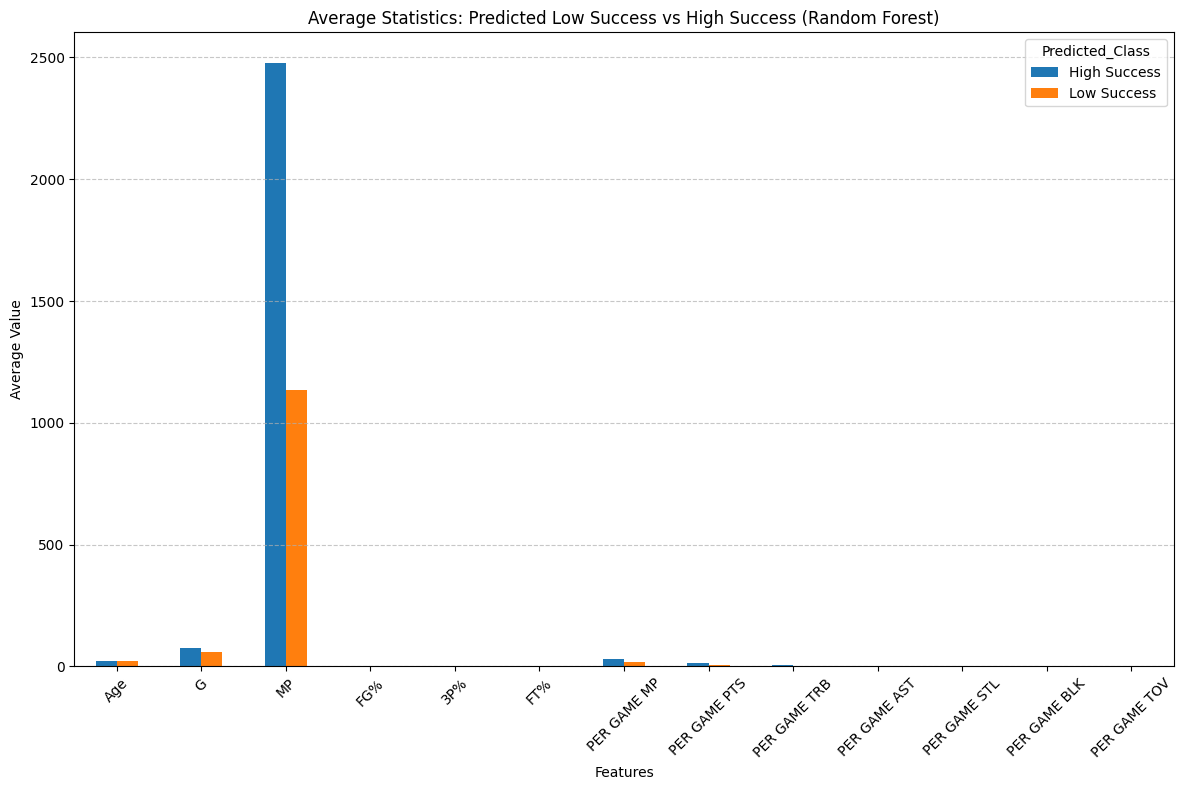

In [138]:
import pandas as pd

# Get predictions from the Random Forest model
y_pred = best_rf.predict(X_test)

# Map predictions to readable labels
label_mapping = {0: "Low Success", 1: "High Success"}
y_pred_mapped = pd.Series(y_pred, index=X_test.index).map(label_mapping)

# Add predictions to the test dataset
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Predicted_Class'] = y_pred_mapped

# Calculate average stats for predicted classes
average_stats_rf = X_test_with_predictions.groupby("Predicted_Class").mean()

# Display the results
print("Average Statistics for Predicted Classes:")
print(average_stats_rf)

# Optional: Visualization
import matplotlib.pyplot as plt

# Transpose the DataFrame for easier plotting
average_stats_rf_transposed = average_stats_rf.T

# Plot the average stats
average_stats_rf_transposed.plot(kind='bar', figsize=(12, 8), title="Average Statistics: Predicted Low Success vs High Success (Random Forest)")
plt.ylabel("Average Value")
plt.xlabel("Features")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


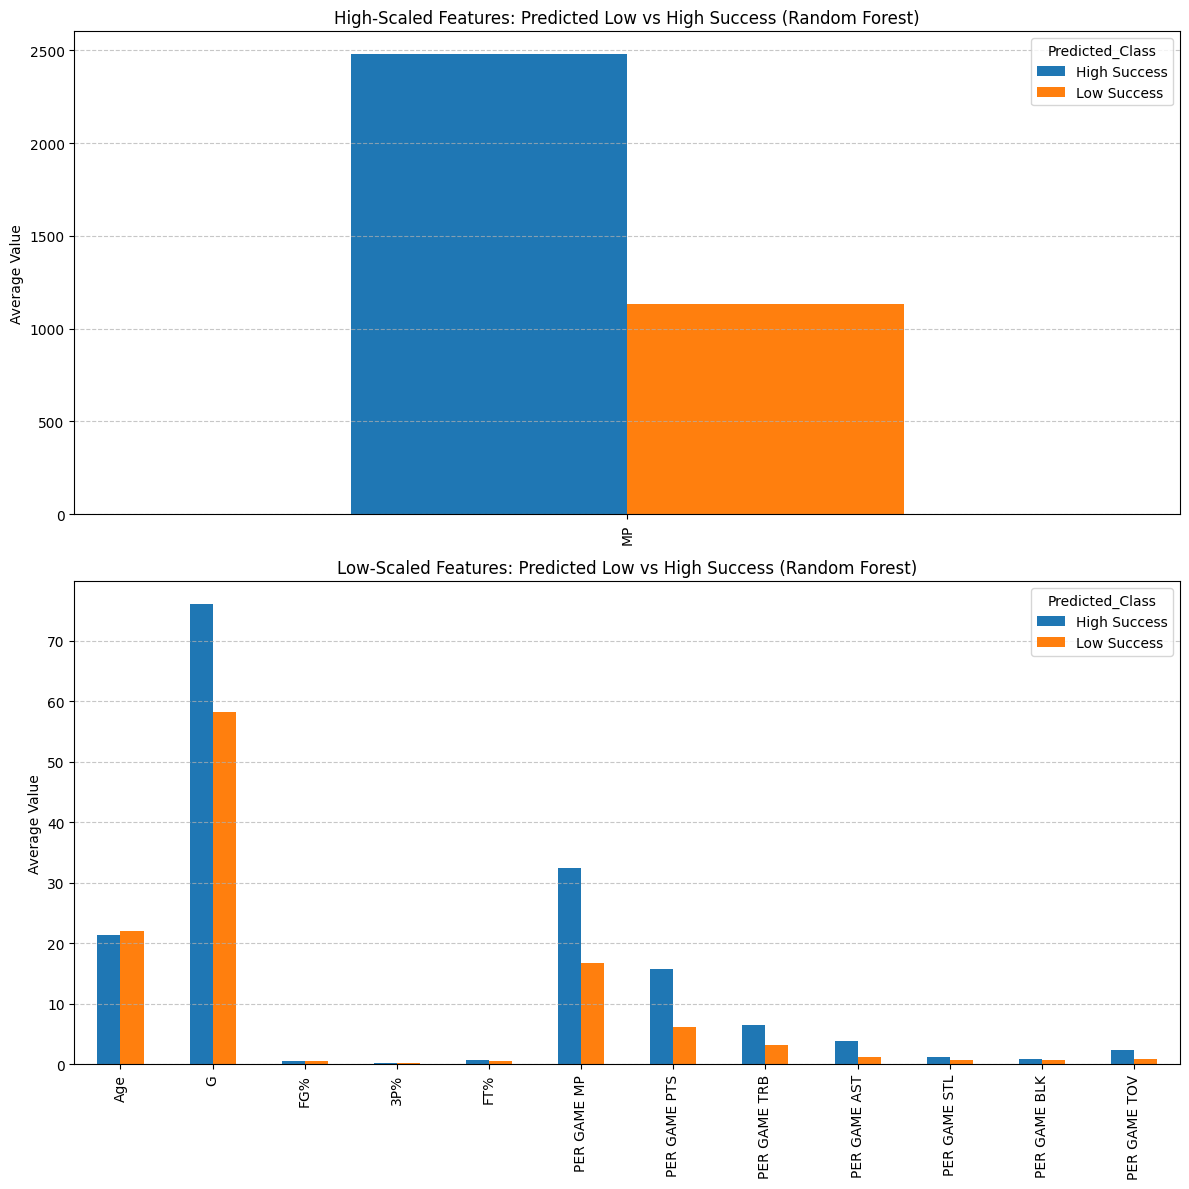

In [141]:
# Normalize feature groups for better scaling
high_scale_features = ["MP"]  # Features with high values
low_scale_features = [f for f in average_stats_rf_transposed.index if f not in high_scale_features]

# Subplot for better visualization
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# High-scale features
average_stats_rf_transposed.loc[high_scale_features].plot(
    kind="bar", ax=axes[0], title="High-Scaled Features: Predicted Low vs High Success (Random Forest)"
)
axes[0].set_ylabel("Average Value")
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

# Low-scale features
average_stats_rf_transposed.loc[low_scale_features].plot(
    kind="bar", ax=axes[1], title="Low-Scaled Features: Predicted Low vs High Success (Random Forest)"
)
axes[1].set_ylabel("Average Value")
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


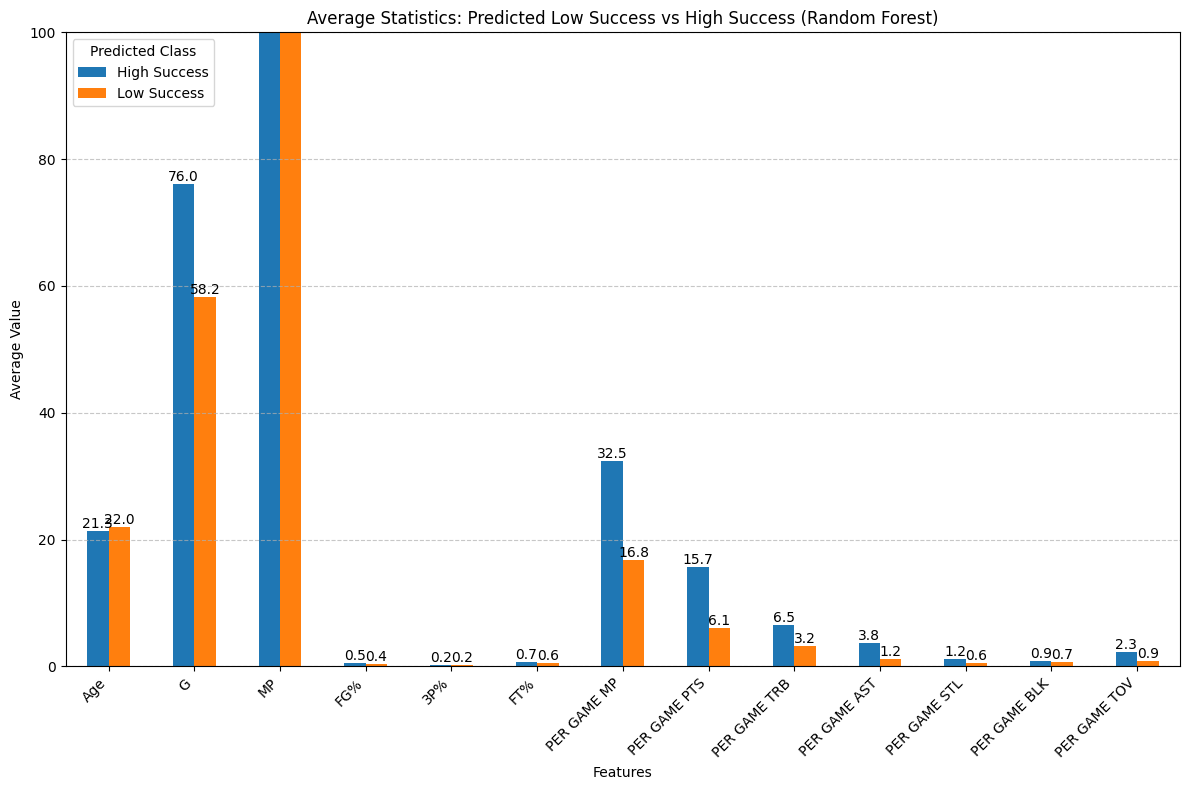

In [120]:
import matplotlib.pyplot as plt

# Plotting the transposed average stats
ax = average_stats_rf_transposed.plot(
    kind="bar",
    figsize=(12, 8),
    color=["#1f77b4", "#ff7f0e"],  # Custom colors for classes
    title="Average Statistics: Predicted Low Success vs High Success (Random Forest)"
)

# Add labels and grid
plt.ylabel("Average Value")
plt.xlabel("Features")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.legend(title="Predicted Class", loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", label_type="edge", fontsize=10)

# Adjust the layout and y-axis to focus on smaller values
plt.ylim(0, 100)  # Example: Adjust y-axis limit to highlight smaller values
plt.tight_layout()

# Show the plot
plt.show()


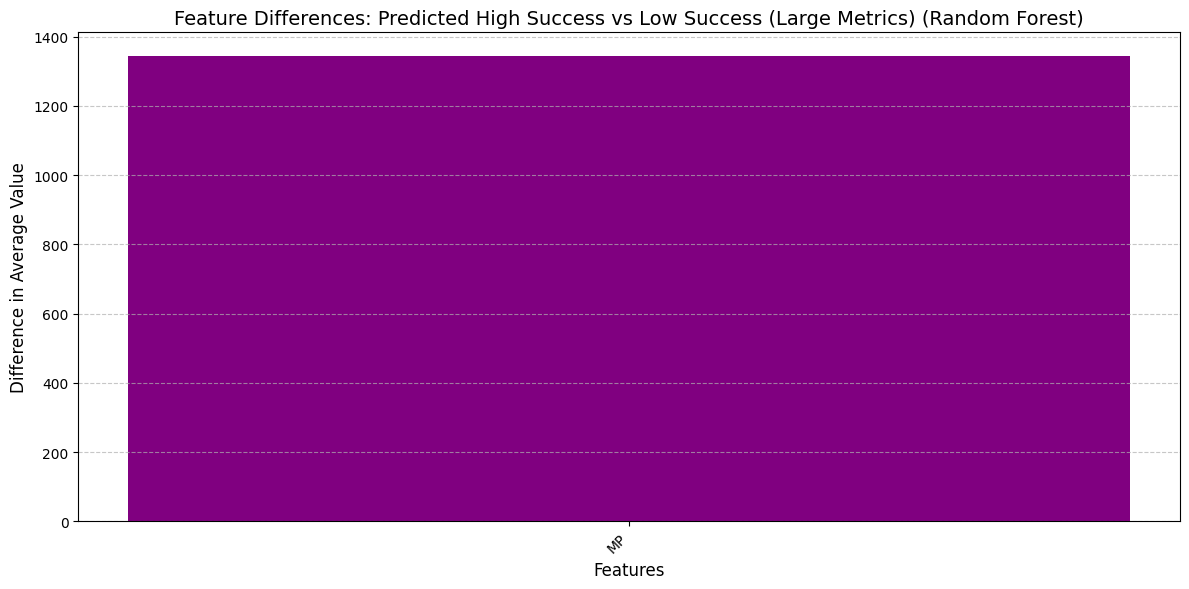

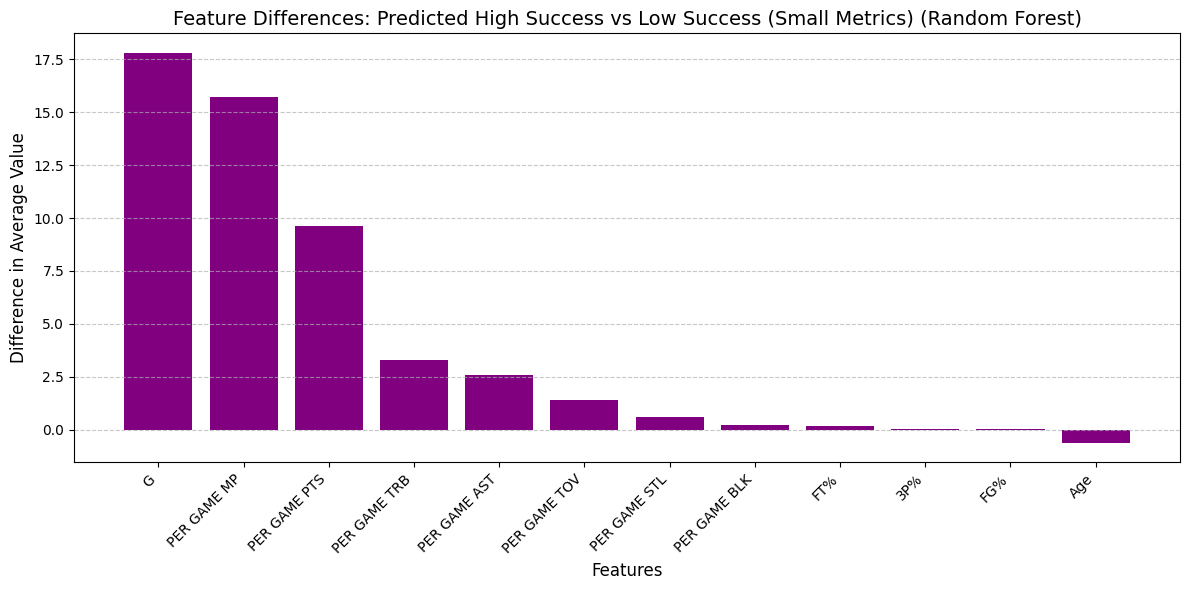

In [121]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate differences between classes
diff_stats = average_stats_rf_transposed.loc[:, "High Success"] - average_stats_rf_transposed.loc[:, "Low Success"]
diff_stats = diff_stats.sort_values(ascending=False)

# Define a threshold to separate large vs small metrics
threshold = 200  # Adjust this value depending on the scale of your metrics

# Split into large and small metrics
large_metrics = diff_stats[diff_stats > threshold]
small_metrics = diff_stats[diff_stats <= threshold]

# Plot the large metrics
plt.figure(figsize=(12, 6))
plt.bar(large_metrics.index, large_metrics, color="purple")
plt.title("Feature Differences: Predicted High Success vs Low Success (Large Metrics) (Random Forest)", fontsize=14)
plt.ylabel("Difference in Average Value", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Plot the small metrics
plt.figure(figsize=(12, 6))
plt.bar(small_metrics.index, small_metrics, color="purple")
plt.title("Feature Differences: Predicted High Success vs Low Success (Small Metrics) (Random Forest)", fontsize=14)
plt.ylabel("Difference in Average Value", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


PermutationExplainer explainer: 84it [00:41,  1.55it/s]                        


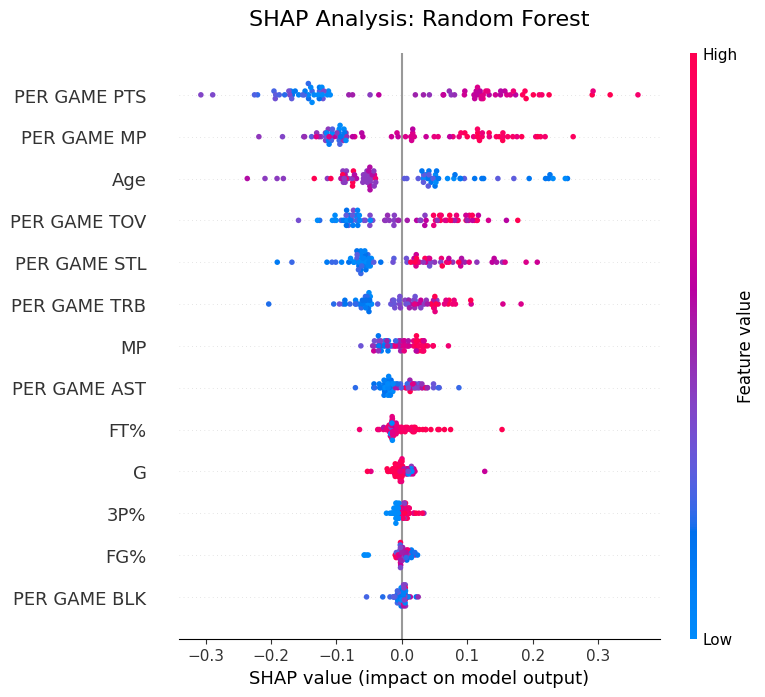

In [99]:
import shap
import matplotlib.pyplot as plt

# Initialize Permutation Explainer
explainer = shap.PermutationExplainer(best_rf.predict, X_test_features_only)

# Compute SHAP values
shap_values = explainer(X_test_features_only)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test_features_only, feature_names=features, show=False)

# Add a title after the SHAP plot is rendered
plt.title("SHAP Analysis: Random Forest", fontsize=16, pad=20)

# Display the plot with the title
plt.show()


In [88]:
# Extract feature importance from Random Forest
importances = best_rf.feature_importances_
feature_importance = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)

# Display sorted feature importance
for feature, importance in feature_importance:
    print(f"{feature}: {importance:.3f}")


PER GAME PTS: 0.202
PER GAME MP: 0.130
Age: 0.126
PER GAME TOV: 0.122
PER GAME TRB: 0.084
MP: 0.061
PER GAME STL: 0.060
FG%: 0.059
PER GAME AST: 0.050
FT%: 0.036
G: 0.026
3P%: 0.025
PER GAME BLK: 0.019


In [89]:
!pip install lime




[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Gebruiker\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


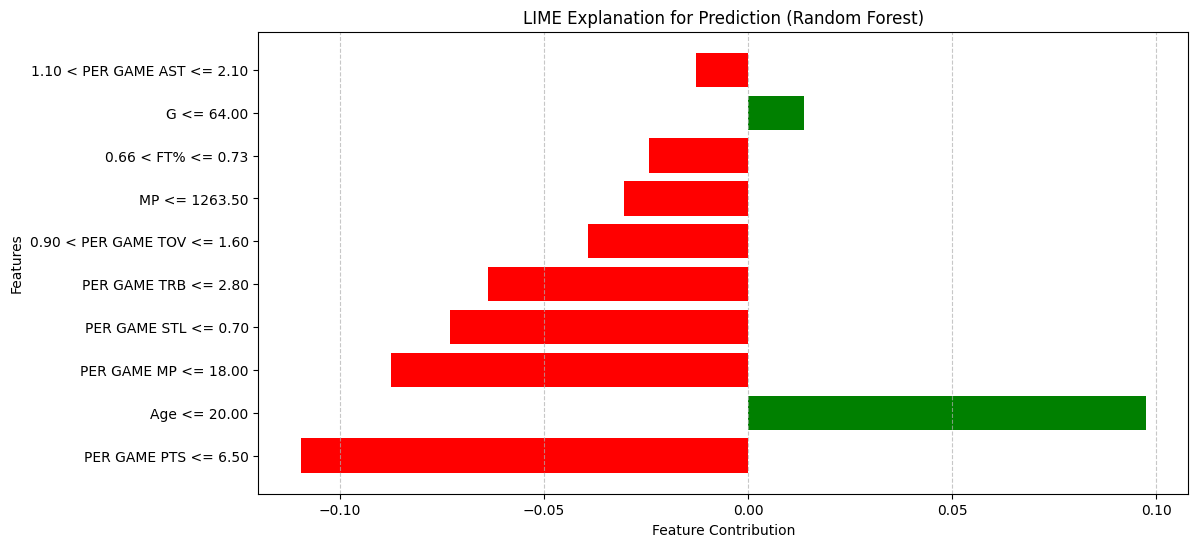

In [122]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# Ensure feature alignment between training and test data
X_train_values = X_train[features].values  # Convert training data to numpy array
X_test_values = X_test[features].values    # Convert test data to numpy array

# Initialize the LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train_values, 
    feature_names=features, 
    class_names=['Low Success', 'High Success'], 
    mode='classification'
)

# Explain a single prediction (e.g., the first test instance)
instance_idx = 0  # Index of the test instance to explain
exp = explainer.explain_instance(
    X_test_values[instance_idx],  # The data instance to explain
    best_rf.predict_proba,        # The prediction function
    num_features=10               # Number of top features to show
)

# Display the explanation
features, weights = zip(*exp.as_list())

# Plot as a horizontal bar chart
plt.figure(figsize=(12, 6))
plt.barh(features, weights, color=["green" if w > 0 else "red" for w in weights])
plt.xlabel("Feature Contribution")
plt.ylabel("Features")
plt.title("LIME Explanation for Prediction (Random Forest)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


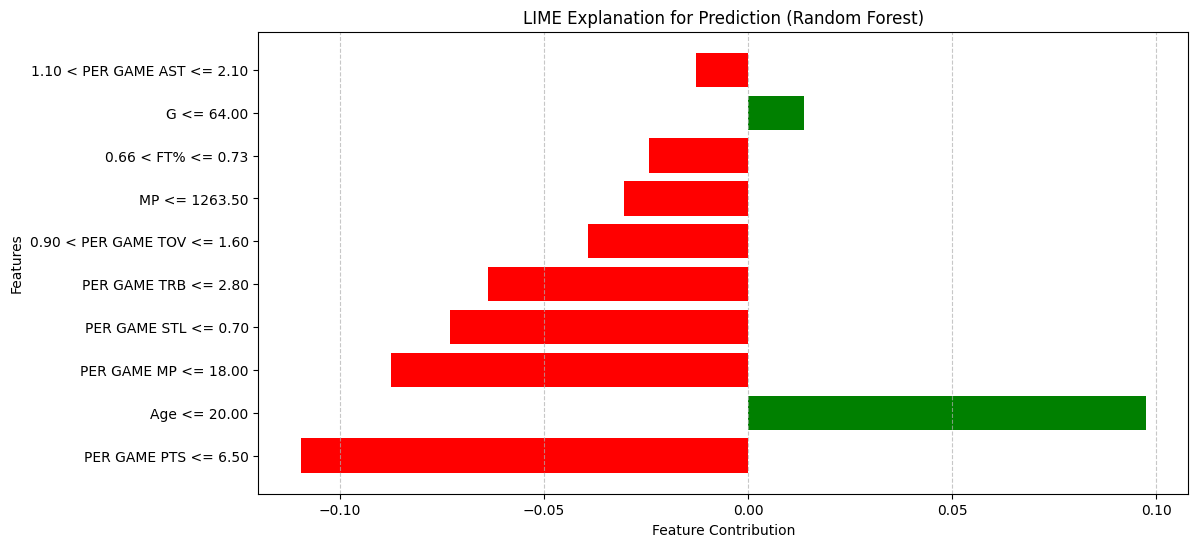

In [123]:
import matplotlib.pyplot as plt

# Extract contributions
features, weights = zip(*exp.as_list())

# Plot as a horizontal bar chart
plt.figure(figsize=(12, 6))
plt.barh(features, weights, color=["green" if w > 0 else "red" for w in weights])
plt.xlabel("Feature Contribution")
plt.ylabel("Features")
plt.title("LIME Explanation for Prediction (Random Forest)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()
